In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets('./03-Convolutional-Neural-Networks/MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
tf.reset_default_graph()

In [7]:
# 784 input
# 392
# 196
# 392
# 784 output 

In [15]:
num_inputs = 784
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1
num_outputs = num_inputs

In [9]:
learning_rate = 0.01

In [10]:
actf = tf.nn.relu

In [12]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [13]:
initializer = tf.variance_scaling_initializer()

In [20]:
w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]), dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2, neurons_hid3]), dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3, num_outputs]), dtype=tf.float32)

In [21]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [22]:
act_func = tf.nn.relu

In [23]:
hid_layer1 = act_func(tf.matmul(X, w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3) + b3)
output_layer = act_func(tf.matmul(hid_layer3, w4) + b4)

In [24]:
loss = tf.reduce_mean(tf.square(output_layer - X))

In [25]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [26]:
train = optimizer.minimize(loss)

In [27]:
init = tf.global_variables_initializer()

In [28]:
saver = tf.train.Saver()

In [29]:
num_epochs= 5
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        num_batches = mnist.train.num_examples // batch_size
        for iteration in range(num_batches):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={X:X_batch})
        training_loss = loss.eval(feed_dict={X:X_batch})
        print("EPOCH : {} LOSS: {}".format(epoch, training_loss))
    saver.save(sess, './example_stacked_autoencoder.ckpt')

EPOCH : 0 LOSS: 0.026259662583470345
EPOCH : 1 LOSS: 0.021907122805714607
EPOCH : 2 LOSS: 0.022525083273649216
EPOCH : 3 LOSS: 0.022283809259533882
EPOCH : 4 LOSS: 0.021169288083910942


In [30]:
num_test_images = 10
with tf.Session() as sess:
    saver.restore(sess, './example_stacked_autoencoder.ckpt')
    results = hid_layer2.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./example_stacked_autoencoder.ckpt


In [31]:
results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

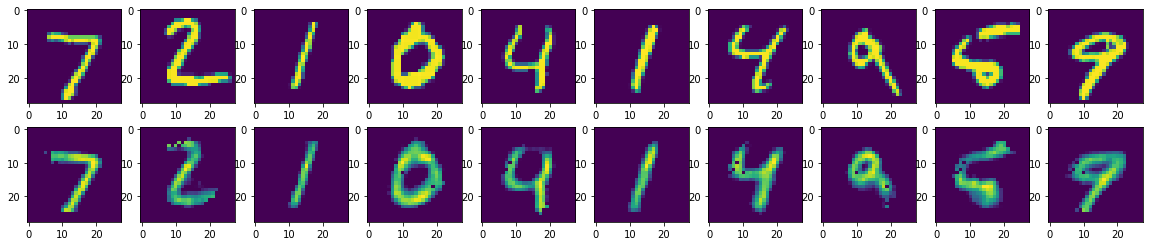

In [33]:
f,a = plt.subplots(2 ,10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    a[1][i].imshow(np.reshape(results[i], (28,28)))